# 新歓 Hands-on 🚀

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yuji96/data-science-notes/blob/main/teaching-materials/%E6%96%B0%E6%AD%93hands-on/notebook.ipynb)

このハンズオンのゴールは、アルファベットを認識するモデルを学習させて、どのような挙動をするのかを観察することです。

## 初期設定

まず、今回使用するツールの初期設定をします。

1. あなたの作業が保存されるようにするために「ドライブにコピー」というボタンを押して下さい。

<img src="https://github.com/yuji96/data-science-notes/blob/main/teaching-materials/新歓hands-on/img/drive.png?raw=true" width="400"/>

2. メニューのランタイムから、ランタイプのタイプを GPU に変更して下さい。

<img src="https://github.com/yuji96/data-science-notes/blob/main/teaching-materials/新歓hands-on/img/GPU1.png?raw=true" width="500"/>

<img src="https://github.com/yuji96/data-science-notes/blob/main/teaching-materials/新歓hands-on/img/GPU2.png?raw=true" width="300"/>




↓ この下にマウスのカーソルを持ってくると「▶」みたいな形をした実行ボタンが現れるので、押して実行して下さい。

In [ ]:
import tensorflow as tf
assert tf.config.experimental.list_physical_devices('GPU'), "ランタイムを GPU に切り替えて下さい。"

続けて下の3つのコードも実行して下さい。

In [ ]:
!pip install -qq git+https://github.com/hosford42/EMNIST.git
!pip install -qq matplotlib-fontja
!pip install -qq dash
!pip install -qq git+https://github.com/plotly/dash-canvas.git@df6e16db3ee56e93674faff6b1d2dd28ef4b3094

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
from IPython.display import Javascript
import matplotlib.pyplot as plt
import numpy as np

import matplotlib_fontja

plt.rcParams["font.size"] = 18

tf.random.set_seed(0)
print(tf.__version__)

2.17.1


## データ準備

それではハンズオンの内容に入っていきます。

今回使用する EMNIST と呼ばれるデータセットをダウンロードします。（データは Google が提供する無料貸出サーバー上にダウンロードされるので、あなたの PC や Google ドライブへの影響はありません。）

このコードの実行には数十秒ほど時間がかかります。

In [4]:
from string import digits, ascii_uppercase, ascii_lowercase
from emnist import extract_training_samples, extract_test_samples

train_x, train_t = extract_training_samples('byclass')
test_x, test_t = extract_test_samples('byclass')

labels = list(digits + ascii_uppercase + ascii_lowercase)
target_to_label = {target: label for target, label in enumerate(labels)}

どのようなデータセットなのかを少し覗いてみます。

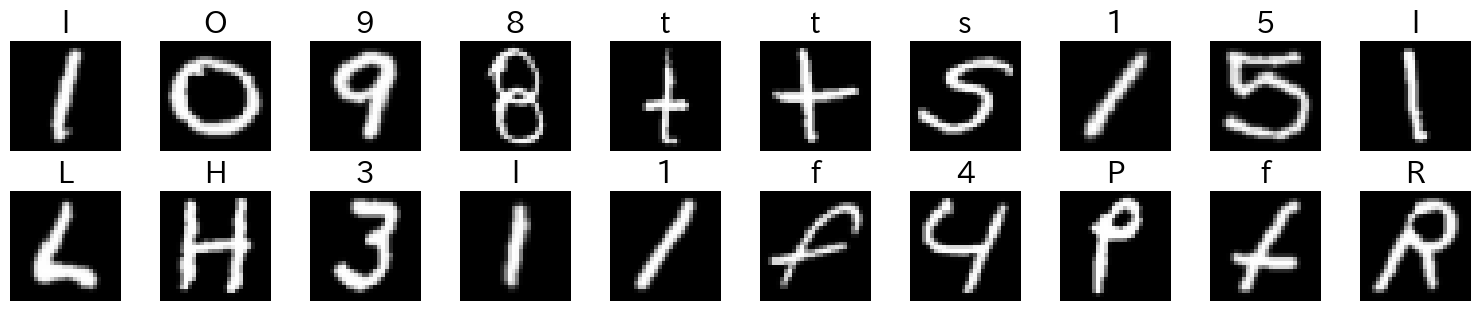

In [5]:
indexes = np.random.randint(train_x.shape[0], size=20)

fig, axes = plt.subplots(2, 10, constrained_layout=True, figsize=[15, 3])
for ax, image, target in zip(axes.flatten(), train_x[indexes], train_t[indexes]):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'{target_to_label[target]}')
    ax.axis("off")

画像データとそれに対応するラベルが表示されました。  
「9」って書いてあるけど「q」に見えるなーってものもあると思います。  
上のセルは実行するたびに表示される画像は変わるので、他の画像も見たい方はもう一度実行してみて下さい。

今回のゴールは、ラベルが付いていない画像がなんのアルファベットなのかを AI に当てさせることです。

## モデルを構築して学習して評価する

### 構築する

今回構築するモデルは**ニューラルネットワーク**です。名前だけなら聞いたことある人は多いかもしれません。
ニューラルネットワークはいくつかの**ユニット**と、それを束にした**レイヤー（layer）**を積み重ねることで成り立ちます。このレイヤーが多い状態を「深い（Deep）」というので、**Deep Learning** という言葉が生まれました。

<img src="https://github.com/yuji96/data-science-notes/blob/main/teaching-materials/新歓hands-on/img/mlp.jpeg?raw=true" width="500"/>

画像出典: https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

今回はニューラルネットワークの隠れ層（hidden layer）を各々で作ってみましょう。
近年は便利なツールを使うことで簡単に書くことができます。

例えば、上図のニューラルネットワークを作りたければ
```python
hidden_layers = [
    HiddenLayer(4),
    HiddenLayer(4),
]
```
とすれば４つのユニットを持ったレイヤーが２個積み重なったニューラルネットワークを作ることができます。

アドバイス：  
今回のデータである EMNIST に対しては、以下の構成が目安となります。

- レイヤーの数は 3〜10 くらいが良さそう。
- １つのレイヤーにおけるユニットの数は 100〜700 くらいが良さそう。

どんな構成にすれば良い結果が出るかはデータによって変わります。
ちなみに、ChatGPT のもとである GPT-3 のレイヤー数は96個で、各レイヤーのユニット数は 12288 個もあります。

In [6]:
from tensorflow.keras.layers import Flatten, Dense, Input

def HiddenLayer(units: int):
    return Dense(units, activation="relu")

In [7]:
hidden_layers = [
    # ここに書く
]

# 例えばこんな感じ
hidden_layers = [
    HiddenLayer(600),  # ← 最後にカンマ 「,」 を付けるのを忘れないようにする。
    HiddenLayer(300),
    HiddenLayer(100),
]

your_model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    *hidden_layers,
    Dense(62, activation="softmax"),
])
your_model.compile(optimizer="adam",
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 600)                 │         471,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         180,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 62)                  │           6,262 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,662 (2.62 MB)

 Trainable params: 687,662 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

### 学習する

先ほど構築したモデルを学習させます。
左下に「Epoch 20/20」表示されたら完了です。

今回は長くても数分程度で終わると思います。
なかなか「Epoch 1/20」から進まなかったり、処理が重すぎてコンピュータが落ちてしまったら、レイヤー数やユニット数を少なくしてスリムなモデルにしましょう。

ちなみに、巨大プロジェクトだと、大規模なモデルを1ヶ月かけて学習することもあります。

In [8]:
def fit(model):
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))
    es = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, verbose=1)
    model.compile(optimizer="adam",
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
    return model.fit(train_x, train_t, batch_size=3000, epochs=20, validation_split=0.2, callbacks=[es])


assert tf.config.experimental.list_physical_devices('GPU'), "ランタイムを GPU に切り替えて下さい。"
history1 = fit(your_model)

<IPython.core.display.Javascript object>

Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.0906 - loss: 17.0752 - val_accuracy: 0.3348 - val_loss: 2.8664
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3736 - loss: 2.6545 - val_accuracy: 0.5229 - val_loss: 2.0084
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5607 - loss: 1.8368 - val_accuracy: 0.6359 - val_loss: 1.3597
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6626 - loss: 1.2314 - val_accuracy: 0.7189 - val_loss: 0.9918
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7345 - loss: 0.9132 - val_accuracy: 0.7572 - val_loss: 0.8207
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7697 - loss: 0.7578 - val_accuracy: 0.7749 - val_loss: 0.7388
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7871 - loss: 0.6814 - val_accuracy: 0.7798 - val_loss: 0.7144
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7970 - loss: 0.6355 - val_accurac

### 評価する

学習中に表示されていた正解率（accuracy）や誤差（loss）を分かりやすくするためにグラフ化します。

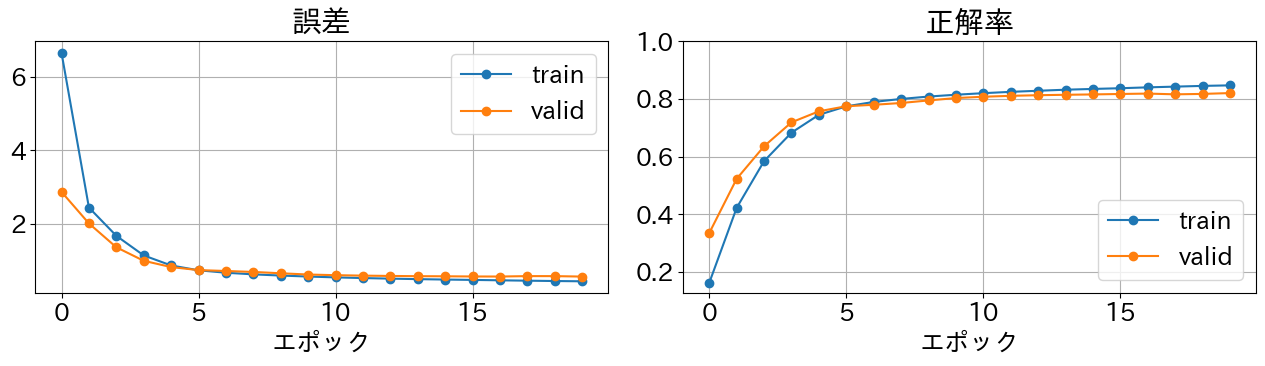

In [ ]:
def show_curve(history):
    fig, (left, right) = plt.subplots(1, 2, figsize=[13, 4])

    left.plot(history.history["loss"], label="train", marker="o")
    left.plot(history.history["val_loss"], label="valid", marker="o")

    right.plot(history.history["accuracy"], label="train", marker="o")
    right.plot(history.history["val_accuracy"], label="valid", marker="o")
    right.set(ylim=[None, 1])

    for ax, title in zip([left, right], ["誤差", "正解率"]):
        ax.legend()
        ax.set(title=title, xlabel="エポック")
        ax.grid(which="both")
    plt.tight_layout()
    return

show_curve(history1)

注意：グラフが表示されるまで十秒ほど時間がかかります。

train（青線）と valid（オレンジ線）はそれぞれ**訓練誤差**と**検証誤差**と呼ばれます。これらは受験における「教科書による勉強」と「模試による評価」で例えると分かりやすいです。

教科書の理解度が深まると模試の点数も上がりますが、何周も学習すると限界が来ます。もしひたすら学習を続けると、モデルは**教科書を理解する**という本当の目的を忘れて、例題の答えを暗記し始めてしまいます。
こうなってしまうと模試で高得点を出せなくなっていきます。

モデルが本来の目的に沿った学習をしているかを確認するために、モデルが教科書の例題（訓練データ）だけでなく初めて目にする模試の問題（検証データ）も正解できるかを確認しながら学習は行われます。

さて、本当の目的は模試ではなく本番の試験です。モデルも同じくテストデータという最終評価のためだけに用意されたデータで評価します。

In [ ]:
your_model.evaluate(test_x, test_t, verbose=1);

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8219 - loss: 0.5585


正解率（accuracy）が 80% くらいならまあまあ良いモデルです。全然届いてなければモデルの規模が少し大きくなるように再構築をする必要があります。

## モデルの分析

「正解率 80% と聞いてどう感じましたか？」

もう少し学習時間があれば精度改善はあるかもしれません。ただ、この資料作成時に色々試しましたが、85% が限界でした。ここからは精度向上に壁がある原因を探ってみましょう。

原因調査の一つに、混同行列を作ってみるという方法があります。

<img src="https://github.com/yuji96/data-science-notes/blob/main/teaching-materials/新歓hands-on/img/cm.jpeg?raw=true" width="400"/>

画像出典: https://analysis-navi.com/?p=553

この図だと、ネコをネコであると AI が正確に識別できたのは 240 回で、ネコをウマだと誤識別したのは 25 回あったと表現されます。良いモデルは対角線上が大きくなります。これを今回のアルファベットのデータでも作成します。

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


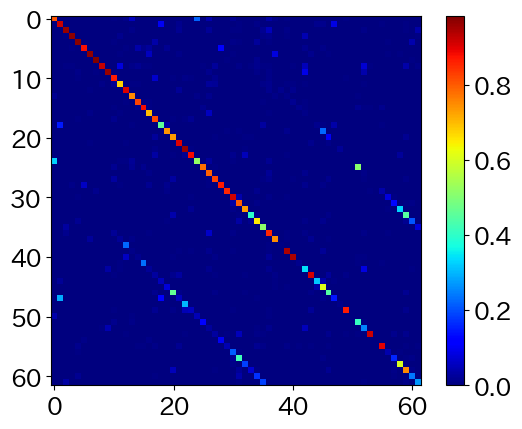

In [ ]:
predict = your_model.predict(test_x)
cm = tf.math.confusion_matrix(test_t, predict.argmax(axis=-1)).numpy()
cm_norm = cm / cm.sum(axis=1)
plt.imshow(cm_norm, cmap="jet")
plt.colorbar();

青から赤になるほど数字が大きいことを意味しています。そこまで悪くないはずなので対角線上に赤っぽい線があると思います。しかし、あることに気づきませんか…？

下のコードを実行すると、間違えやすかったアルファベットが列挙されます。どのような、共通点があるでしょう？

In [ ]:
import pandas as pd

weak = pd.DataFrame({"label": labels, "真陽": cm_norm.diagonal()})
weak.sort_values("真陽").head(10).T

,50,54,38,48,41,56,47,57,60,52
label,o,s,c,m,f,u,l,v,y,q
真陽,0.0,0.002288,0.00463,0.010776,0.0125,0.041494,0.144773,0.160256,0.24147,0.253465


下のコードは `o`（小文字のオー）がどこに分類されやすいかを表している図です。
`label = "o"` を `label = "1"` などに変更すると `1` の分類先を見ることもできます。

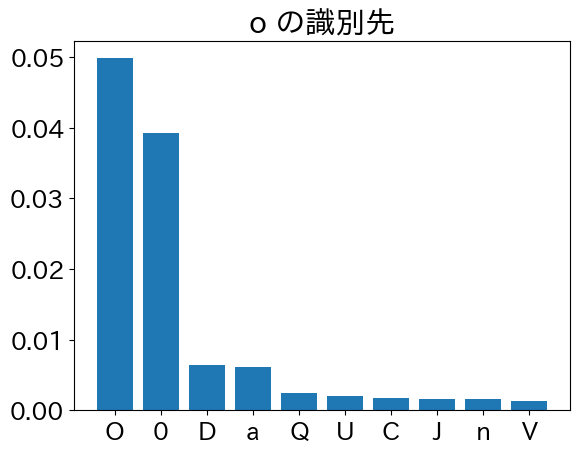

In [ ]:
label = "o"

label_to_target = {v: k for k, v in target_to_label.items()}
target = label_to_target[label]
df = pd.DataFrame({"labels": labels, "pred": cm_norm[target]}).sort_values("pred", ascending=False).head(10)
plt.bar(data=df, x="labels", height="pred")
plt.title(f"{label} の識別先");

このモデルを改善するにはどのようなことをすればいいでしょう…。このアイデアを練ってそれを実際に作ってみるというのが、データサイエンスや機械学習の醍醐味です。

## 使ってみる

これが今回のハンズオンの最後です。
実際に自分で書いた文字をモデルに予測させてみましょう。
左側に字を描けるキャンバスがあり、右側に予測結果を表示するためのグラフエリアが出ます。この予測結果はモデルの自信の強さです。

注意：グラフが表示されるまで10秒ほど時間がかかります。また、初回の予測にも数10秒ほど時間がかかります。

In [ ]:
np.bool = bool  # dash_canvas がバグらないようにパッチ

import cv2
from dash import dcc, html, Input, Output
from dash_canvas import DashCanvas
from dash_canvas.utils import parse_jsonstring
from dash import Dash
import pandas as pd
import plotly.express as px


model = your_model
app = Dash(__name__)
W = H = 400

app.layout = html.Div([
    DashCanvas(id='canvas', width=W, height=H, lineWidth=35, goButtonTitle="予測する",
               hide_buttons=["zoom", "pan", "line", "pencil", "rectangle", "select"]),
    dcc.Graph(id="graph"),
], style={"display": "flex"})


@app.callback(Output("graph", "figure"), Input('canvas', 'json_data'))
def read_canvas(string):
    if not string:
        # model.predict(np.zeros(28, 28))
        return px.bar()

    image = parse_jsonstring(string).astype(float)[:H, :W] * 255
    image = cv2.resize(image, dsize=(28, 28)).reshape(1, 28, 28)

    predict = pd.DataFrame({"score": model.predict(image).flatten(),
                            "label": labels})
    fig = px.bar(predict.nlargest(10, "score")[::-1], x="score", y="label", orientation='h')
    fig.update_layout(font={"size": 25}, xaxis={'range': [0, 1]})
    return fig

app.run()

お疲れ様でした！

今回は `HiddenLayer(100)` などを書いただけでニューラルネットワークができてしまいましたが、それが数学的にはどんな仕組みなのかというのもとても興味深い世界です。